# Final Exam
Name:  Christopher Truong
Class: INST 447  
Section: MWF 0101
Favorite animal:  Dog or Swordfish

Welcome to the last set of data gymnastics that you will have to compelete in this class!

Here is a tweet with a cute dog to keep you motivated:
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">This is Libby. She leap. 14/10<br>(IG: libbythefluffycorgi) <a href="https://t.co/pSt9QBSYNw">pic.twitter.com/pSt9QBSYNw</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/993629544463642624?ref_src=twsrc%5Etfw">May 7, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>




# DUE DATE
**SECTION 0101** 	Wed, May 16 	10:00 AM

**SECTION 0102** 	Thu, May 17 	3:30 PM


## Ground rules

You may use any resource available to you with the exception of other sentient entities. This means that you may use your notes, resources from the Internet, books, etc. This manifests with the following abosolute requirements: 1) the code must be yours, 2) though you may use Internet resources, you may not ask questions on forums, stackoverflow, twitter, youtube, etc. 

Despite any evidence to the contrary, I qualify as a sentient entity. However, you may ask me questions, but I may not answer them. I am likely to provide clarifications about questions in the exam.

You may talk to other sentient entities about topics complete unrelated to the exam. I, naturally, do not expect you to go into seclusion. That would just be cruel.

## Instructions
Think of this as a series of puzzles. You have all the skills required to complete this task.

## Points Value
There are 33 questions. Each question is worth 3 points. The remaining 1 point is for filling out the header info with your name, the section you are in, and your favorite animal. Seriously, I will mark you down if you don't fill out the header info.

In [110]:
# These are our imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import json
from lxml import etree
import requests
import re
from bs4 import BeautifulSoup

%matplotlib inline

### Working with Pandas
The DataFrame `ex_df` will be used for questions 1 - 8.

In [12]:
ex_df = pd.DataFrame({'Events': ['End of Classes', 'Commencement', 'iSchool Ceremony'],
                      'Dates': [ '2018-05-10', '18 May 2018 13:00', 'May 21, 2018 4:00pm'],
                      'Tickets_Required': ['No', 'Yes', 'Yes'],
                      'Tickets_Requested': ['None', '4', '15']})
ex_df

,Dates,Events,Tickets_Requested,Tickets_Required
0,2018-05-10,End of Classes,None,No
1,18 May 2018 13:00,Commencement,4,Yes
2,"May 21, 2018 4:00pm",iSchool Ceremony,15,Yes


#### Q1: What are the types currently?
Use a pandas function to identify the current types in the columns.

In [13]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
Dates                3 non-null object
Events               3 non-null object
Tickets_Requested    3 non-null object
Tickets_Required     3 non-null object
dtypes: object(4)
memory usage: 176.0+ bytes


In [33]:
ex_df.dtypes

Events                object
Tickets_Requested    float64
Tickets_Required        bool
dtype: object

#### Q2: Convert the column Dates
Use a pandas function to conver the column `Dates` to the proper data type.

In [14]:
ex_df['Dates'] = pd.to_datetime(ex_df['Dates'])

ex_df

,Dates,Events,Tickets_Requested,Tickets_Required
0,2018-05-10 00:00:00,End of Classes,None,No
1,2018-05-18 13:00:00,Commencement,4,Yes
2,2018-05-21 16:00:00,iSchool Ceremony,15,Yes


#### Q3: Convert the column Tickets_Requested
The column `Tickets_Requested` is currently a string. Convert it to a number in a way that handles the value "None" appropriately.

In [15]:
ex_df['Tickets_Requested'] = pd.to_numeric(ex_df['Tickets_Requested'], errors='coerce')
ex_df

,Dates,Events,Tickets_Requested,Tickets_Required
0,2018-05-10 00:00:00,End of Classes,NaN,No
1,2018-05-18 13:00:00,Commencement,4.0,Yes
2,2018-05-21 16:00:00,iSchool Ceremony,15.0,Yes


#### Q4: Convert the column Tickets_Required
The column `Tickets_Required` looks like it would be best represented as a boolean. Convert the strings in the column to boolean values.

In [17]:
ex_df = ex_df.replace({'Tickets_Required': {'Yes': True, 'No': False}})
ex_df

,Dates,Events,Tickets_Requested,Tickets_Required
0,2018-05-10 00:00:00,End of Classes,NaN,False
1,2018-05-18 13:00:00,Commencement,4.0,True
2,2018-05-21 16:00:00,iSchool Ceremony,15.0,True


#### Q5: Drop row with the NaN value
Create a copy of the `ex_df` DataFrame and name it `drop_df`. The row with the NaN should no longer be present.

In [21]:
drop_df = ex_df.copy()
drop_df = drop_df.dropna(how='any',axis=0) 
drop_df

,Dates,Events,Tickets_Requested,Tickets_Required
1,2018-05-18 13:00:00,Commencement,4.0,True
2,2018-05-21 16:00:00,iSchool Ceremony,15.0,True


#### Q6: Replace the NaN value with 0
Create a copy of the `ex_df` DataFrame and name it `fill_df`. The NaN value should be replaced with a zero.

In [23]:
fill_df = ex_df.copy()
fill_df = fill_df.fillna(0)
fill_df

,Dates,Events,Tickets_Requested,Tickets_Required
0,2018-05-10 00:00:00,End of Classes,0.0,False
1,2018-05-18 13:00:00,Commencement,4.0,True
2,2018-05-21 16:00:00,iSchool Ceremony,15.0,True


#### Q7: Set the index to the column Dates
Change the index for the `ex_df` DataFrame to be Dates column.

In [24]:
ex_df.set_index('Dates', inplace=True)
ex_df

,Events,Tickets_Requested,Tickets_Required
Dates,,,
2018-05-10 00:00:00,End of Classes,NaN,False
2018-05-18 13:00:00,Commencement,4.0,True
2018-05-21 16:00:00,iSchool Ceremony,15.0,True


#### Q8: Save to CSV
Write the DataFrame as a CSV file into the data directory. Name the file with your `lastname+'-ex.csv'`. For example, my file would be named `heidenblad-ex.csv`.

In [26]:
ex_df.to_csv('truong-ex.csv', index=False)

#### Q9: Combining 2 DataFrames
These two DataFrames are related by the column `id`. Combine them into a DataFrame named `merged_df` so that they appear like this:

<table>
    <tr>
        <th></th>
        <th>id</th>
        <th>val_in_a</th>
        <th>val_in_b</th>
    </tr>
    <tr>
        <td><b>0</b></td>
        <td>1</td>
        <td>Apple</td>
        <td>Banana</td>
    </tr>
    <tr>
        <td><b>1</b></td>
        <td>2</td>
        <td>Aardvark</td>
        <td>Beaver</td>
    </tr>
    <tr>
        <td><b>2</b></td>
        <td>3</td>
        <td>Accountamt</td>
        <td>Banker</td>
    </tr>
    <tr>
        <td><b>3</b></td>
        <td>5</td>
        <td>Adjustment</td>
        <td>NaN</td>
    </tr>
    <tr>
        <td><b>4</b></td>
        <td>6</td>
        <td>Absence</td>
        <td>NaN</td>
    </tr>
    <tr>
        <td><b>5</b></td>
        <td>4</td>
        <td>NaN</td>
        <td>Balance</td>
    </tr>
</table>

In [34]:
a_df = pd.DataFrame({'id': [1, 2, 3, 5, 6],
                     'val_in_a': ['Apple', 'Aardvark', 'Accountamt', 'Adjustment', 'Absence']})

b_df = pd.DataFrame({'id': [2, 1, 3, 4],
                     'val_in_b': ['Beaver', 'Banana', 'Banker', 'Balance']})

In [40]:
merged_df = pd.merge(a_df, b_df,how='outer')
merged_df

,id,val_in_a,val_in_b
0,1,Apple,Banana
1,2,Aardvark,Beaver
2,3,Accountamt,Banker
3,5,Adjustment,NaN
4,6,Absence,NaN
5,4,NaN,Balance


#### Q10: Sort the list.
Sort the DataFrame on the `val_in_b` column.

In [43]:
merged_df = merged_df.sort_values('val_in_b')
merged_df

,id,val_in_a,val_in_b
5,4,NaN,Balance
0,1,Apple,Banana
2,3,Accountamt,Banker
1,2,Aardvark,Beaver
3,5,Adjustment,NaN
4,6,Absence,NaN


### Working with XML
The file `nutrition.xml` is in the `data` directory. Open the file in a text editor so that you can see the general structure. Then proceed below.

#### Q11: Load the XML data
Import the file `nutrition.xml` from the `data` directory into a variable named `nutrition`.

In [246]:
nutrition = etree.parse('data/nutrition.xml')

#### Q12 & Q13: Create a DataFrame
Create a DataFrame from the `nutrition.xml` file that is contained in `nutrition` such that it looks like the example below (there is no avacado toast in `nutrition.xml`).

<table>
    <tr>
        <th>calories_fat</th>
        <th>calories_total</th>
        <th>carb</th>
        <th>cholesterol</th>
        <th>fiber</th>
        <th>food_name</th>
        <th>protein</th>
        <th>saturated_fat</th>
        <th>serving</th>
        <th>total_fat</th>
    </tr>
    <tr>
        <td>324</td>
        <td>701</td>
        <td>58</td>
        <td>2</td>
        <td>14.6</td>
        <td>26</td>
        <td>10.0</td>
        <td>1 slice</td>
        <td>36</td>
    </tr>
</table>


** Q12: ** Load the specifed data into *our favorite data structure* using a for loop.

In [247]:
nutrition_list = []

print(nutrition.findall('//food'))

for food in nutrition.findall('//food'):
    data_structure = {}
    for child in food.getchildren():
        if child.tag == 'calories':
            data_structure['calories'] = child.attrib.get('fat')
            ca = child.attrib.get('total')
        data_structure[child.tag] = child.text
        for more in child.getchildren():
            data_structure[more.tag] = more.text
            
       
    nutrition_list.append(data_structure)
  

[<Element food at 0x20d15256608>, <Element food at 0x20d15256e08>, <Element food at 0x20d15256ec8>, <Element food at 0x20d15256908>, <Element food at 0x20d15256cc8>, <Element food at 0x20d15256fc8>, <Element food at 0x20d15256e88>, <Element food at 0x20d15256488>, <Element food at 0x20d15256788>, <Element food at 0x20d158fb7c8>]


### ** Q13: ** Convert *our favorite data structure* into a DataFrame.

In [248]:
nutrition_df = pd.DataFrame(nutrition_list)
nutrition_df

,a,c,ca,calories,carb,cholesterol,fe,fiber,mfr,minerals,name,protein,saturated-fat,serving,sodium,total-fat,vitamins
0,0,0,0,None,2,5,0,0,Sunnydale,\n,Avocado Dip,1,3,29,210,11,\n
1,0,0,8,None,54,0,20,3,Thompson,\n,"Bagels, New York Style",11,1,104,510,4,\n
2,0,2,1,None,8,65,6,0,Armitage,\n,"Beef Frankfurter, Quarter Pound",13,15,115,1100,32,\n
3,20,2,2,None,42,25,10,2,Lakeson,\n,Chicken Pot Pie,10,9,198,810,22,\n
4,30,45,4,None,5,0,2,2,Fresh Quick,\n,Cole Slaw,1,0,1.5,15,0,\n
5,6,0,2,None,1,215,4,0,Goodpath,\n,Eggs,6,1.5,50,65,4.5,\n
6,0,0,6,None,23,0,4,2,Ferreira,\n,Hazelnut Spread,3,2,2,20,10,\n
7,0,10,0,None,15,0,0,1,Lees,\n,Potato Chips,2,3,28,180,10,\n
8,0,0,0,None,10,0,0,4,Gardenproducts,\n,"Soy Patties, Grilled",9,0,96,420,5,\n
9,0,0,0,None,16,25,0,1,Lyndon's,\n,"Truffles, Dark Chocolate",1,14,39,10,19,\n


In [249]:
nutrition_df = nutrition_df.drop(nutrition_df.columns[[0, 1, 2, 6, 8, 9, 14, 16]], axis=1) 
nutrition_df.columns = ['calories_fat', 'carb', 'cholesterol', 'fiber', 'food_name', 
                                       'protein', 'saturated_fat', 'serving', 'total_fat']

nutrition_df

,calories_fat,carb,cholesterol,fiber,food_name,protein,saturated_fat,serving,total_fat
0,None,2,5,0,Avocado Dip,1,3,29,11
1,None,54,0,3,"Bagels, New York Style",11,1,104,4
2,None,8,65,0,"Beef Frankfurter, Quarter Pound",13,15,115,32
3,None,42,25,2,Chicken Pot Pie,10,9,198,22
4,None,5,0,2,Cole Slaw,1,0,1.5,0
5,None,1,215,0,Eggs,6,1.5,50,4.5
6,None,23,0,2,Hazelnut Spread,3,2,2,10
7,None,15,0,1,Potato Chips,2,3,28,10
8,None,10,0,4,"Soy Patties, Grilled",9,0,96,5
9,None,16,25,1,"Truffles, Dark Chocolate",1,14,39,19


#### Q14: Make the column data types make sense.
Convert the columns to the appropriate data types.

In [251]:
cols = ['calories_fat','cholesterol','fiber','protein','saturated_fat','serving','total_fat']
nutrition_df[cols] = nutrition_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

nutrition_df

,calories_fat,carb,cholesterol,fiber,food_name,protein,saturated_fat,serving,total_fat
0,NaN,2,5.0,0.0,Avocado Dip,1.0,3.0,29.0,11.0
1,NaN,54,0.0,3.0,"Bagels, New York Style",11.0,1.0,104.0,4.0
2,NaN,8,65.0,0.0,"Beef Frankfurter, Quarter Pound",13.0,15.0,115.0,32.0
3,NaN,42,25.0,2.0,Chicken Pot Pie,10.0,9.0,198.0,22.0
4,NaN,5,0.0,2.0,Cole Slaw,1.0,0.0,1.5,0.0
5,NaN,1,215.0,0.0,Eggs,6.0,1.5,50.0,4.5
6,NaN,23,0.0,2.0,Hazelnut Spread,3.0,2.0,2.0,10.0
7,NaN,15,0.0,1.0,Potato Chips,2.0,3.0,28.0,10.0
8,NaN,10,0.0,4.0,"Soy Patties, Grilled",9.0,0.0,96.0,5.0
9,NaN,16,25.0,1.0,"Truffles, Dark Chocolate",1.0,14.0,39.0,19.0


#### Q15: Show me the first 5 rows of the DataFrame
Use the pandas function to show me the first 5 rows.

In [252]:
nutrition_df.head(5)

,calories_fat,carb,cholesterol,fiber,food_name,protein,saturated_fat,serving,total_fat
0,NaN,2,5.0,0.0,Avocado Dip,1.0,3.0,29.0,11.0
1,NaN,54,0.0,3.0,"Bagels, New York Style",11.0,1.0,104.0,4.0
2,NaN,8,65.0,0.0,"Beef Frankfurter, Quarter Pound",13.0,15.0,115.0,32.0
3,NaN,42,25.0,2.0,Chicken Pot Pie,10.0,9.0,198.0,22.0
4,NaN,5,0.0,2.0,Cole Slaw,1.0,0.0,1.5,0.0


#### Q16: Create a plot
Show me visually how the total_fat relates to the calories_fat using a line plot from matplotlib's pyplot.

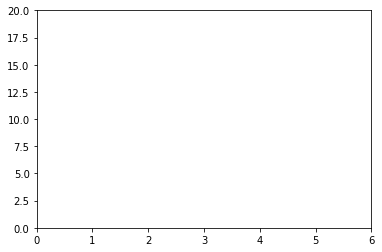

In [253]:
plt.plot(nutrition_df['total_fat'], nutrition_df['calories_fat'], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()
#there is no visualization because i wasn't able to import the data successfully, but this is what the 
#code would be like to visualize it successfully ahd I accomplished the previous step

### Working with HTML
This is a web scraping task. We will use the *requests* library to scrape this page: https://forecast.weather.gov/MapClick.php?lat=38.9807&lon=-76.9373

#### Q17: Scrape the page.

Use the *requests* library to pull down the page.

In [58]:
r = requests.get("https://forecast.weather.gov/MapClick.php?lat=38.9807&lon=-76.9373")

#### Q18: Was the request successful?
Check if the request was successful.

In [59]:
r.status_code == requests.codes.ok

True

#### Q19: Create a BeautifulSoup object.
Parse the response to create a BeautifulSoup object named `soup`.

In [62]:
soup = BeautifulSoup(r.text, 'lxml')
soup

<!DOCTYPE html>
<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"/><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shor

#### Q20-24: Pull out the data from the soup object
When you look at the page. You will see under the header "Extended Forcast" as series of images depicting the weather.

Q20: Find the appropriate element to select so that we can loop each of those blocks.  
Q21: Only save data for blocks that *do not have* the word "night" in the period name (the header for each block).   
Q22: Save the day "Period Name" (the header for each block).  
Q23: Save the high temperature string.  
Q24: Extract the number value for the high temperature from the string **using Regex** and convert the value to an int.  



In [292]:
sections = soup.select('#seven-day-forecast-list')
sections

[<ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Overnight<br/><br/></p>
 <p><img alt="Overnight: Showers and thunderstorms before 2am, then showers likely and possibly a thunderstorm after 2am. Some of the storms could produce heavy rain.  Low around 66. South wind around 5 mph becoming southeast.  Chance of precipitation is 80%. New rainfall amounts between a tenth and quarter of an inch, except higher amounts possible in thunderstorms. " class="forecast-icon" src="newimages/medium/ntsra80.png" title="Overnight: Showers and thunderstorms before 2am, then showers likely and possibly a thunderstorm after 2am. Some of the storms could produce heavy rain.  Low around 66. South wind around 5 mph becoming southeast.  Chance of precipitation is 80%. New rainfall amounts between a tenth and quarter of an inch, except higher amounts possible in thunderstorms. "/></p><p class="short-desc">Heavy Ra

In [297]:
temp_list = []
# Q20: Put something in the select statement so that it loops through each of the weather blocks
for day in soup.select('#seven-day-forecast-container'):
    # Q21: Check to see if the word "night" is not in the header of the block (replace the False with your 
    #check.)

    if "night" not in soup.select('.period-name'):
        # Q22: Save the period name (fill in the appropriate class in the select_one)
        period  = day.select_one('.period-name')
        # I am removing the <br/> that appears inside the text.
        period_name = ' '.join(b for b in period if str(b) != '<br/>')
        # Q23: Save the temperature string
        temp_str = day.select_one('.temp-low').get_text()
        # Q24: Extract the number and convert to int.
        temp_int = temp_str
    

        temp_list.append({'period': period_name, 'high_temp': temp_int})


temp_df = pd.DataFrame(temp_list)
temp_df

,high_temp,period
0,Low: 66 °F,Overnight


### Working with SQL

For this section we are going to use the file `veekun-pokedex.sqlite` that is in the `data` directory.

The following SQL is suffiction to select the required data.

In [103]:
poke_sql = '''SELECT pokemon.identifier, height, 
weight, capture_rate, hp_stats.base_stat as hp, 
attack_stats.base_stat as attack, 
defense_stats.base_stat as defense
FROM pokemon 
JOIN pokemon_species ON pokemon.species_id = pokemon_species.id
JOIN pokemon_stats as hp_stats ON pokemon.id = hp_stats.pokemon_id
JOIN stats s1 ON hp_stats.stat_id = s1.id AND s1.identifier = 'hp'
JOIN pokemon_stats as attack_stats ON pokemon.id = attack_stats.pokemon_id
JOIN stats s2 ON attack_stats.stat_id = s2.id AND s2.identifier = 'attack'
JOIN pokemon_stats as defense_stats ON pokemon.id = defense_stats.pokemon_id
JOIN stats s3 ON defense_stats.stat_id = s3.id AND s3.identifier = 'defense'
WHERE pokemon_species.generation_id = 1
AND pokemon.is_default = 1;'''

#### Q25: Connect to the database
Connect to the database and save the connection in a variable named `poke_db`.

In [104]:
poke_db = sqlite3.connect("data/veekun-pokedex.sqlite")

#### Q26: Execute the Query to create a DataFrame
Use `poke_sql` to create a DataFrame named `poke_df`.

In [105]:
poke_df = pd.read_sql_query(poke_sql, poke_db)

#### Q27: Save the DataFrame as a Table
Save the DataFrame `poke_df` as a table named `poke_combined`. If the table exists, then overwrite the existing table.

In [108]:
poke_df.to_sql('poke_combined', poke_db, if_exists='replace')

#### Q28: Create some histograms
Create some histograms from `poke_df` so that we can understand the distribution of the values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D153BE128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020D156F6160>]], dtype=object)

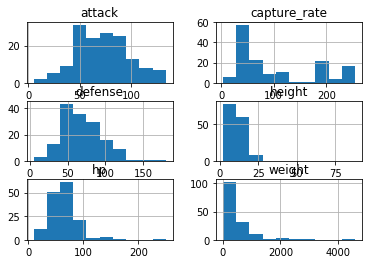

In [114]:
poke_df.hist()  

### Working with JSON
One last DataType to prepare and that is JSON.

We will use the JSON in the string below.

In [115]:
json_str = '{"results" : [{"address_components" : [{"long_name" : "10th Street Northwest","short_name" : "10th St NW","types" : [ "route" ]},{"long_name" : "Northwest Washington","short_name" : "Northwest Washington","types" : [ "neighborhood", "political" ]},{"long_name" : "Washington","short_name" : "Washington","types" : [ "locality", "political" ]},{"long_name" : "District of Columbia","short_name" : "DC","types" : [ "administrative_area_level_1", "political" ]},{"long_name" : "United States","short_name" : "US","types" : [ "country", "political" ]},{"long_name" : "20001","short_name" : "20001","types" : [ "postal_code" ]}],"formatted_address" : "10th St NW & U St NW, Washington, DC 20001, USA","geometry" : {"location" : {"lat" : 38.917007,"lng" : -77.02598569999999},"location_type" : "GEOMETRIC_CENTER","viewport" : {"northeast" : {"lat" : 38.9183559802915,"lng" : -77.02463671970848},"southwest" : {"lat" : 38.9156580197085,"lng" : -77.0273346802915}}},"partial_match" : true,"place_id" : "Ei8xMHRoIFN0IE5XICYgVSBTdCBOVywgV2FzaGluZ3RvbiwgREMgMjAwMDEsIFVTQQ","types" : [ "intersection" ]}],"status" : "OK"}'

#### Q29: Convert the JSON string
Use the correct JSON library functions to load the string stored in `json_str` into a variable named `json_obj`.

In [117]:
json_obj = json.loads(json_str)

#### Q30: What type is that?
What type is the variable `json_obj`?

In [121]:
type(json_obj)       #for python it is referred to as a dictionary 
                     #in general it is a javascript data object 

dict

#### Q31: Extract the  formatted name of the address
Pull out the formatted name for the address that is contained in the JSON.

In [137]:
json_obj['results'][0]['formatted_address']

'10th St NW & U St NW, Washington, DC 20001, USA'

#### Q32: Create a tuple that contains the latitude and longitude.
Pull out the latitude and longitude of the location and save it in a variable named `geo_location`.

In [144]:
geo_location = json_obj['results'][0]['geometry']['location'].items()
geo_location

dict_items([('lat', 38.917007), ('lng', -77.02598569999999)])

#### Q33: Filter DataFrame using Regex.
Write a regex that will cause filter to return only the pokemon whose name contains 5 letters in a row that are not vowels.

In [177]:
# Filter goes over the index, so I am setting the index to the pokemon's names stored in identifier.
p2 = poke_df.set_index('identifier')
# Q33: Put your regex in the quotes below
p2.filter(regex=r'([b-df-hj-np-tv-z])\1{5,}', axis='rows')

,height,weight,capture_rate,hp,attack,defense
identifier,,,,,,
